# Applied ML Project 1: Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Boston Dataset

### Load Data

In [2]:
# load boston.csv into a pandas dataframe
df_b = pd.read_csv('../data/boston/boston.csv')

### Clean Data

In [3]:
# remove the feature 'B' for ethical issues
df_b = df_b.drop('B', axis=1)

### Explore Data

#### Basic Information

In [28]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [6]:
# compute basic statistics
df_b.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Class distributions

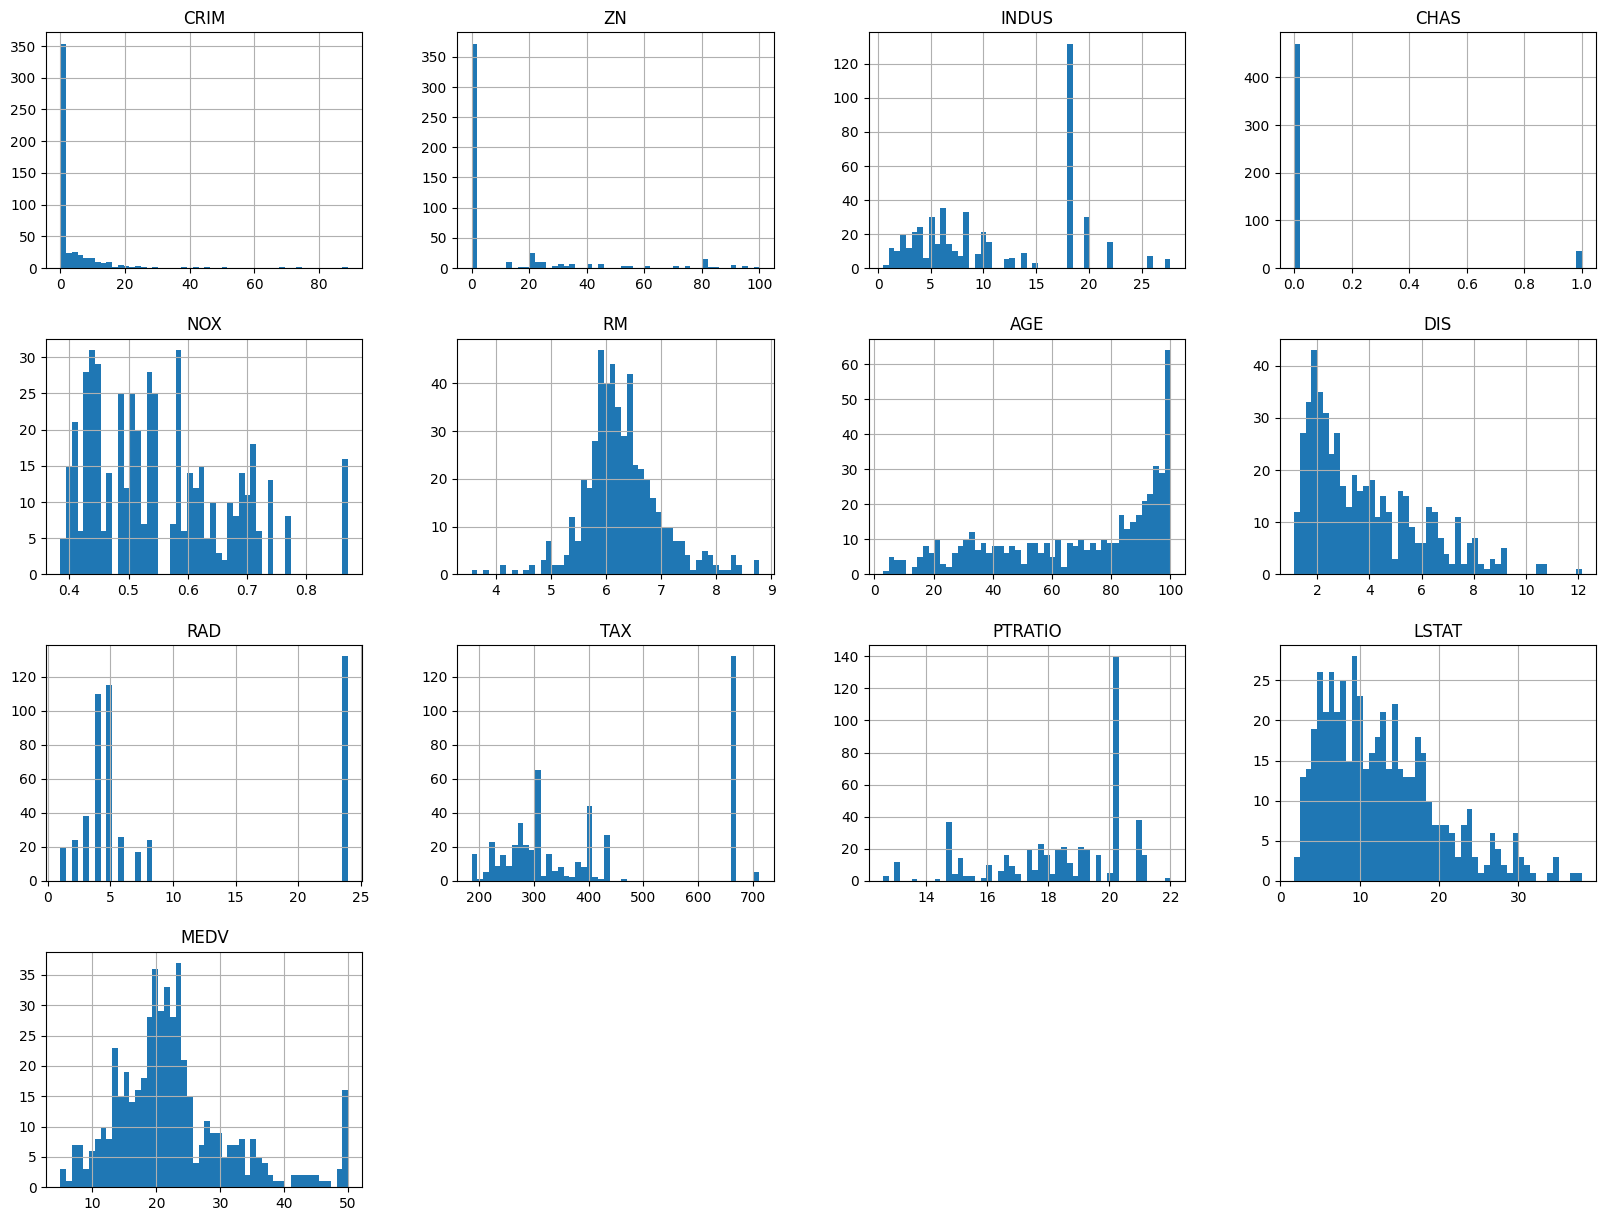

In [7]:
# plot histograms of class distributions
df_b.hist(bins=50, figsize=(20,15))
plt.show()

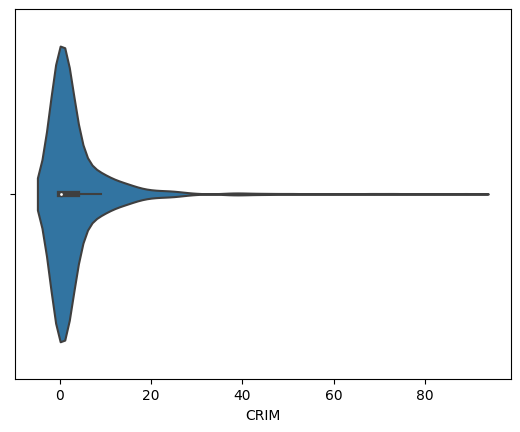

In [27]:
# plot violin plots of class distributions
# fig, ax = plt.subplots(figsize=(20,15))
# sns.violinplot(data=df_b, ax=ax)
# plt.show()

sns.violinplot(x='CRIM', data=df_b)
plt.show()

#### Univariate analysis

In [ ]:
# TODO

#### Bivariate analysis: Feature vs Target

In [ ]:
# TODO

#### Correlation Analysis

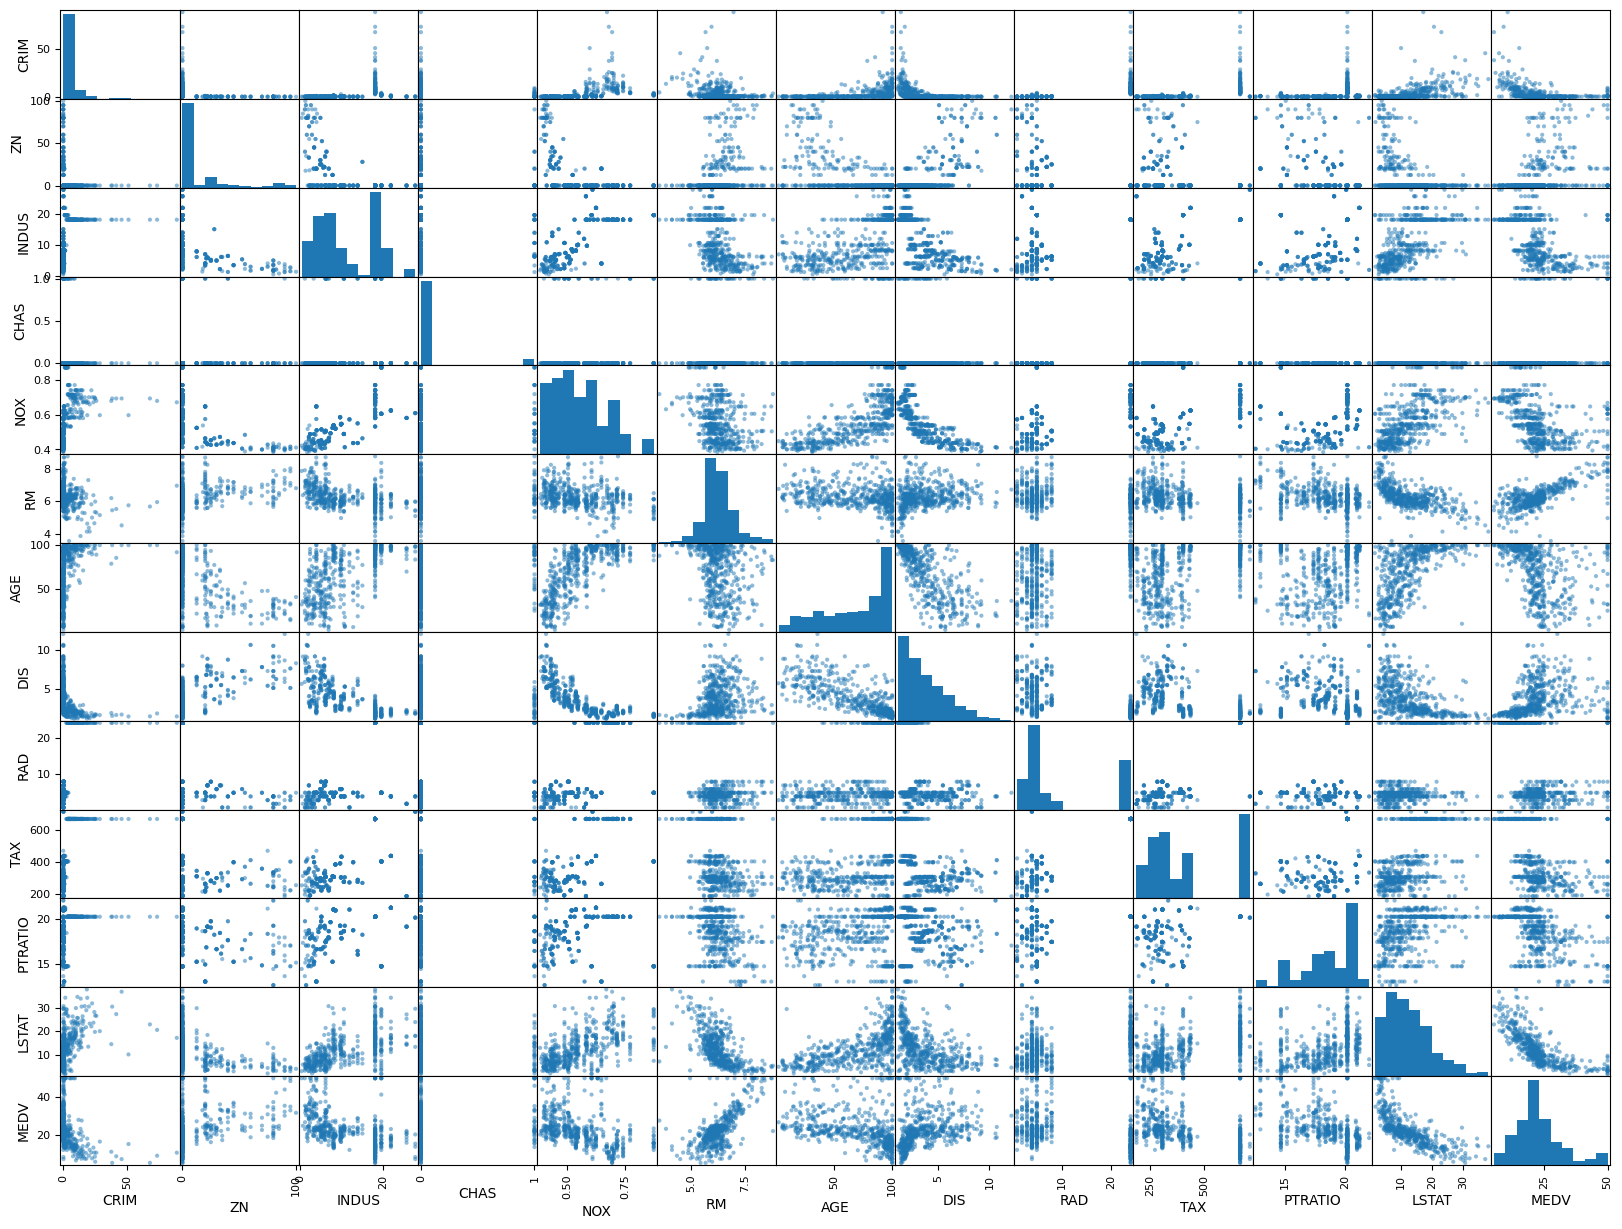

In [8]:
# plot scatter matrix to see class correlations
from pandas.plotting import scatter_matrix
scatter_matrix(df_b, figsize=(20,15))
plt.show()

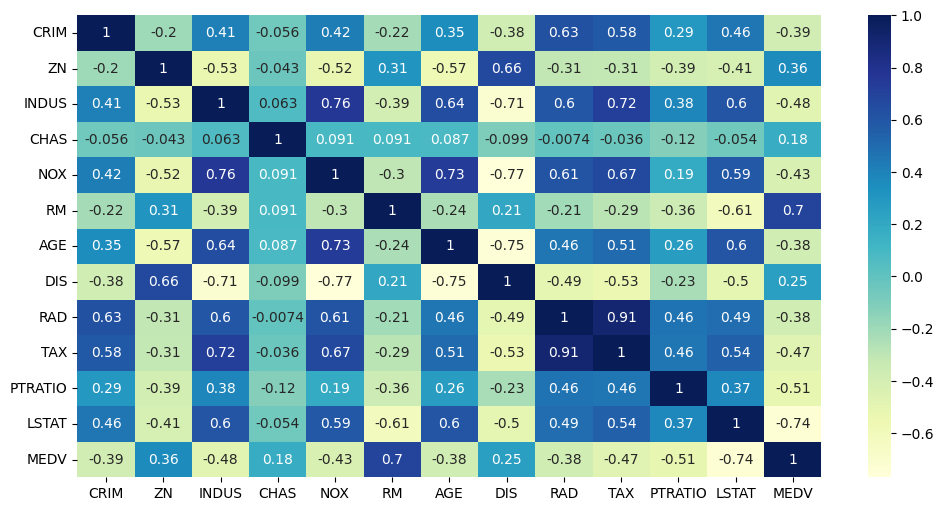

In [12]:
# plot the correlation matrix 
corr_matrix = df_b.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

### Data Analysis Summary

- x
- y
- z

## Wine Dataset

### Load Data

In [10]:
# load wine data set